In [ ]:
# Online
#https://partofthething.com/barn-door-jupyter-sheet.html

In [1]:
import math
sidereal_day_hours = 23.9344699
rads_per_sec = 2*math.pi/sidereal_day_hours/3600
print(rads_per_sec)

7.292115761437147e-05


In [2]:
import numpy as np

In [3]:
time = np.linspace(0,100*60,50)

In [4]:
length_in_cm = 20

In [5]:
def yt(length, ts):
    return length * np.tan(rads_per_sec * ts)
    
def ypt(length, ts):
    cm_per_sec = length/np.cos(rads_per_sec * ts)**2* rads_per_sec  # chain rule
    return cm_per_sec

In [6]:
import matplotlib.pyplot as plt
lengths_in_cm = [20,30,40]

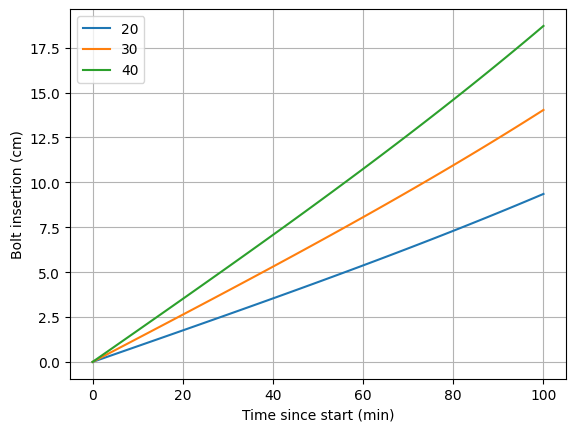

In [7]:
# plot bolt length vs. time
for length in lengths_in_cm:
    y = yt(length, time)
    plt.plot(time/60.0, y, label=str(length))
plt.legend()
plt.grid(color='0.7')
plt.ylabel('Bolt insertion (cm)')
plt.xlabel('Time since start (min)')
plt.show()

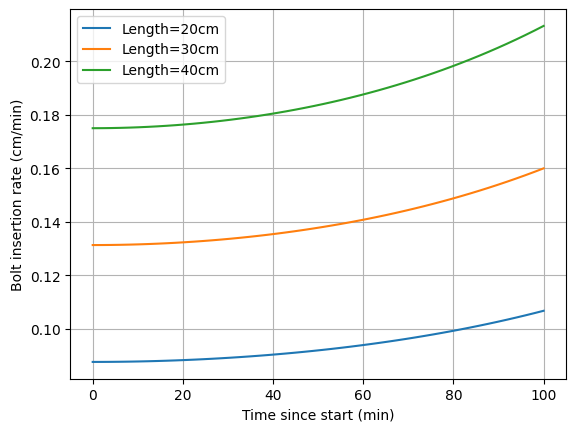

In [8]:
for length in lengths_in_cm:
    y = ypt(length, time)
    plt.plot(time/60.0, y*60.0, label='Length={}cm'.format(length))
plt.legend()
plt.grid(color='0.7')
plt.ylabel('Bolt insertion rate (cm/min)')
plt.xlabel('Time since start (min)')
plt.show()


In [9]:
rotations_per_cm = 20/2.54  # -20 threads per inch
print(rotations_per_cm)

7.874015748031496


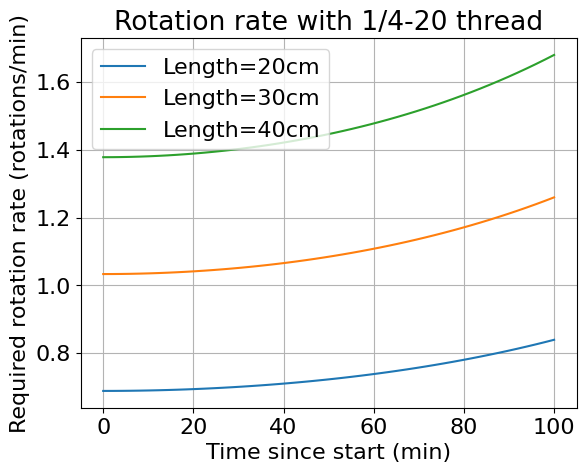

In [10]:
plt.rcParams.update({'font.size':16})
for length in lengths_in_cm:
    rotations_per_second = rotations_per_cm * ypt(length, time)
    plt.plot(time/60.0, rotations_per_second*60,label='Length={}cm'.format(length))
    plt.legend()
    plt.grid(color='0.7')
    plt.ylabel('Required rotation rate (rotations/min)')
    plt.xlabel('Time since start (min)')
plt.title('Rotation rate with 1/4-20 thread')
plt.show()
#plt.savefig('rotation_rate.png')

In [11]:
# real calculation for my apparatus
rotations_per_second = rotations_per_cm * ypt(29.113, time)

In [12]:
seconds_per_doublestep = 1.0/(rotations_per_second*2048)


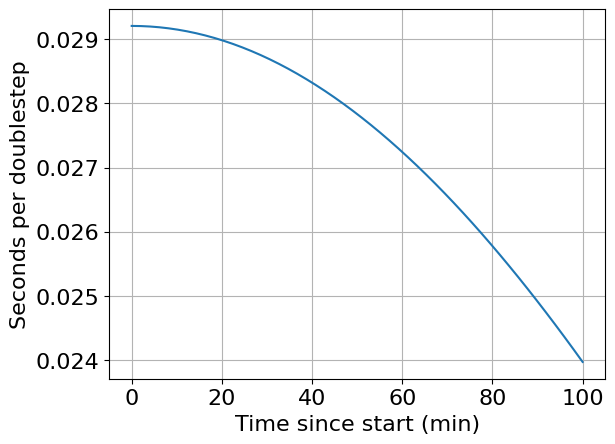

In [13]:
plt.plot(time/60.0, seconds_per_doublestep)
plt.grid(color='0.7')
plt.ylabel('Seconds per doublestep')
plt.xlabel('Time since start (min)')
plt.show()

In [14]:
print(1/(rotations_per_second*60))


[0.99703856 0.99695907 0.99672062 0.9963233  0.99576721 0.99505256
 0.99417955 0.99314847 0.99195965 0.99061347 0.98911036 0.98745079
 0.9856353  0.98366446 0.98153891 0.97925931 0.97682641 0.97424097
 0.97150381 0.96861582 0.96557791 0.96239105 0.95905626 0.9555746
 0.95194719 0.94817516 0.94425975 0.94020218 0.93600375 0.9316658
 0.92718973 0.92257694 0.91782892 0.91294718 0.90793328 0.9027888
 0.89751541 0.89211477 0.88658861 0.88093869 0.87516681 0.86927482
 0.86326459 0.85713804 0.85089713 0.84454384 0.83808019 0.83150826
 0.82483014 0.81804795]


In [15]:
# My apparatus' theta_0 calculation
height_at_bolt = 1.347 
height_at_hinge= 0.758
distance = 29.113-4.70
theta0_rad = math.atan((height_at_bolt-height_at_hinge)/distance)
print(theta0_rad)  

0.024121810376201452
